In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from pathlib import Path

In [2]:
# Use seaborn theme
sns.set_theme(style="white", context="paper")

# Set your mpl settings
mpl.rcParams["figure.facecolor"] = "w"
mpl.rcParams["figure.dpi"] = 150
mpl.rcParams["savefig.dpi"] = 600
mpl.rcParams["savefig.transparent"] = True
mpl.rcParams["font.size"] = 40
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.sans-serif"] = ["Arial"]
mpl.rcParams["axes.titlesize"] = "xx-large"
mpl.rcParams["pdf.fonttype"] = 42
mpl.rcParams["ps.fonttype"] = 42
mpl.rcParams["axes.labelsize"] = 30
mpl.rcParams["xtick.labelsize"] = 30
mpl.rcParams["ytick.labelsize"] = 30
mpl.rcParams["text.color"] = 'black'

In [3]:
csv_path = "plantwise_testsets_metrics.csv"

# Read csv with metrics for all models when using plantwise test-sets
df = pd.read_csv(csv_path)

In [4]:
root_lengths_path = "average_root_lengths.csv"
# Read csv with average root lengths for all user-labeled data per model
df_root_lengths = pd.read_csv(root_lengths_path)

FileNotFoundError: [Errno 2] No such file or directory: 'figure-5\\average_root_lengths.csv'

**Median Localization Error**

In [ ]:
# Print average median localization error for all models
df[["Root-label", "Error distance (50%) mm"]].groupby("Root-label").apply(np.nanmean).sort_values()

Root-label
Soybean lateral (5-8 DAG)      0.327268
Canola lateral (5-13 DAG)      0.365802
Rice primary (3 DAG)           0.539643
Rice seminal (3 DAG)           0.661921
Arabidopsis lateral (7 DAG)    0.842702
Canola primary (5-13 DAG)      1.282756
Arabidopsis primary (7 DAG)    1.537197
Soybean primary (5-8 DAG)      1.668541
Rice seminal (10 DAG)          2.280872
dtype: float64

meta NOT subset; don't know how to subset; dropped


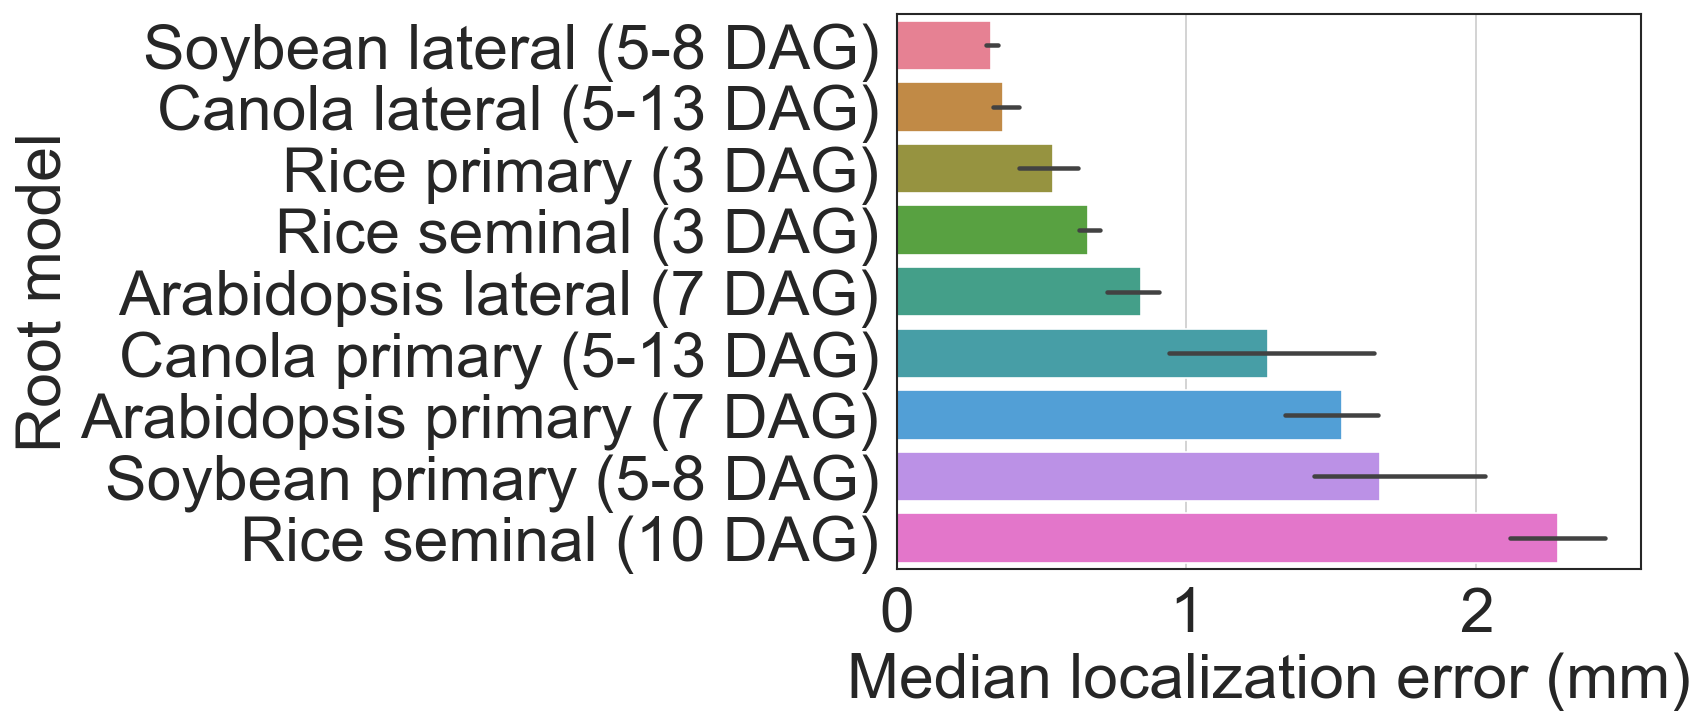

In [ ]:
order = df[["Root-label", "Error distance (50%) mm"]].groupby("Root-label").apply(np.nanmean).sort_values().index

# sns.set_theme(style="white", context="talk")
ax = sns.barplot(data=df_all, y="Root-label", x="Error distance (50%) mm", order=order, palette="husl")
# plt.ylabel('Root model')
# plt.xlabel('Median localization error of test set (mm)')
ax.set(xlabel='Median localization error (mm)', ylabel='Root model')
ax.grid(axis='x')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
plt.show

plt.savefig(r"figures/accuracy/median_loc_error.png", bbox_inches = "tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_error.pdf", bbox_inches = "tight", facecolor="white")

In [ ]:
# Get the color codes from the "husl" palette
husl_colors = sns.color_palette("husl", 9)

# Convert the color codes to a list of tuples
custom_colors = [tuple(color) for color in husl_colors]

# Print the color codes
for color in custom_colors:
    print(color)

(0.9677975592919913, 0.44127456009157356, 0.5358103155058701)
(0.8369430560927636, 0.5495828952802333, 0.1952683223448124)
(0.6430915736746491, 0.6271955086583126, 0.19381135329796756)
(0.3126890019504329, 0.6928754610296064, 0.1923704830330379)
(0.20582072623426667, 0.6842209016721069, 0.5675558225732941)
(0.2151139535594307, 0.6700707833028816, 0.7112365203426209)
(0.23299120924703914, 0.639586552066035, 0.9260706093977744)
(0.731751635642941, 0.5128186367840487, 0.9581005178234921)
(0.9614880299080136, 0.3909885385134758, 0.8298287106954371)


meta NOT subset; don't know how to subset; dropped


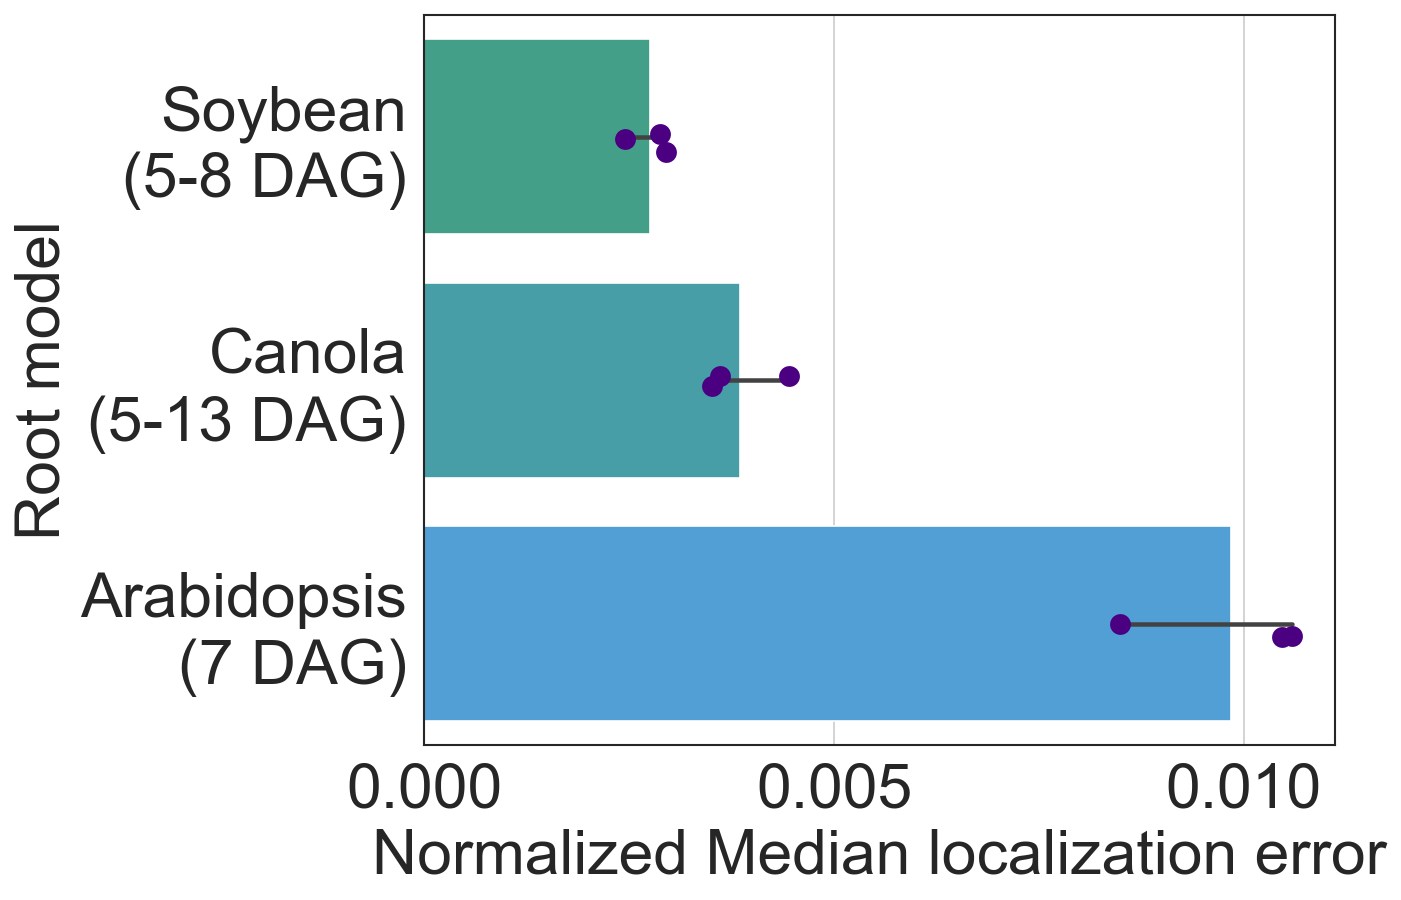

In [ ]:
trait = "Error distance (50%) mm"

# Define the list of target labels
lateral_labels = ["Soybean lateral (5-8 DAG)", "Canola lateral (5-13 DAG)", "Arabidopsis lateral (7 DAG)"]

# Filter the dataframe based on the target labels
lateral_df = df_all[df_all["Root-label"].isin(lateral_labels)]

# Create a dataframe with the average root lengths for the target labels
avg_df = df_model_avg_root_lengths[df_model_avg_root_lengths["Root-label"].isin(lateral_labels)].groupby("Root-label")["Average Root Length"].mean()

# Normalize the trait by dividing by the average root length for each model and sample
lateral_df = lateral_df.copy()  # create a copy to avoid modifying the original df
lateral_df[f"{trait}"] = lateral_df.apply(lambda row: row[f"{trait}"] / avg_df[row["Root-label"]], axis=1)

order_lat = lateral_df[["Root-label", f"{trait}"]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "lateral" and put parentheses part on a new line
y_labels_lr = [label.replace(" lateral", "").replace(" (", "\n(") for label in lateral_labels]

fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot
sns.barplot(data=lateral_df, y="Root-label", x=f"{trait}", order=order_lat, palette=custom_colors[4:7], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=lateral_df, y="Root-label", x=f"{trait}", color="#4B0082", marker='o', size=10, order=order_lat, jitter=True, ax=ax)

ax.set(xlabel='Normalized Median localization error', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_lr)

plt.tight_layout()

# Show or save the plot
plt.savefig(r"figures/accuracy/normalized_median_loc_error_laterals.png", bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/normalized_median_loc_error_laterals.pdf", bbox_inches="tight", facecolor="white")

C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
meta NOT subset; don't know how to subset; dropped


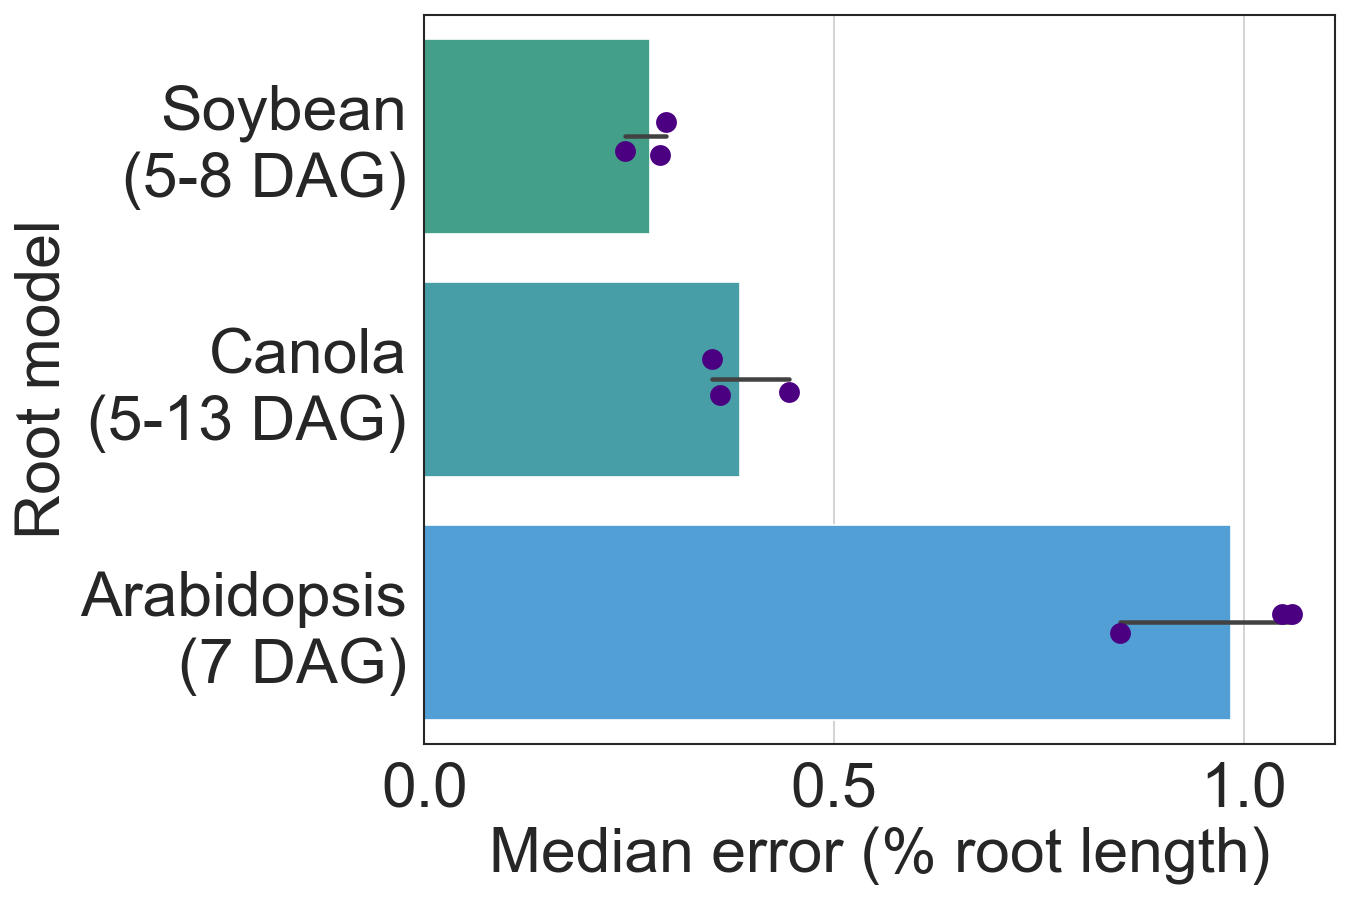

In [ ]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Define the list of target labels
lateral_labels = ["Soybean lateral (5-8 DAG)", "Canola lateral (5-13 DAG)", "Arabidopsis lateral (7 DAG)"]

# Filter the dataframe based on the target labels
lateral_df = df_all[df_all["Root-label"].isin(lateral_labels)]

# Create a dataframe with the average root lengths for the target labels
avg_df = df_model_avg_root_lengths[df_model_avg_root_lengths["Root-label"].isin(lateral_labels)].groupby("Root-label")["Average Root Length"].mean()
# Add the average root length as a new column in primary_df
lateral_df['Average Root Length'] = lateral_df['Root-label'].map(avg_df)

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
lateral_df[normalized_trait] = lateral_df.apply(lambda row: (row[trait] / avg_df[row["Root-label"]]) * 100, axis=1)

# Order by mean error 
order_lat = lateral_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "lateral" and put parentheses part on a new line
y_labels_lr = [label.replace(" lateral", "").replace(" (", "\n(") for label in order_lat]

fig, ax = plt.subplots(figsize=(10, 7))

# Bar plot
sns.barplot(data=lateral_df, y="Root-label", x=normalized_trait, order=order_lat, palette=custom_colors[4:7], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=lateral_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_lat, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_lr)

plt.tight_layout()

# Save the plot
png_path = r"figures/accuracy/median_loc_percent_root_length_error_laterals.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_percent_root_length_error_laterals.pdf", bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
lateral_df.to_csv(csv_path, index=False)

In [ ]:
# Define the list of target labels
primary_labels = ["Rice primary (3 DAG)", "Canola primary (5-13 DAG)", "Arabidopsis primary (7 DAG)", "Soybean primary (5-8 DAG)"]

# Filter the dataframe based on the target labels
primary_df = df_all[df_all["Root-label"].isin(primary_labels)]
primary_df.shape

(12, 13)

meta NOT subset; don't know how to subset; dropped


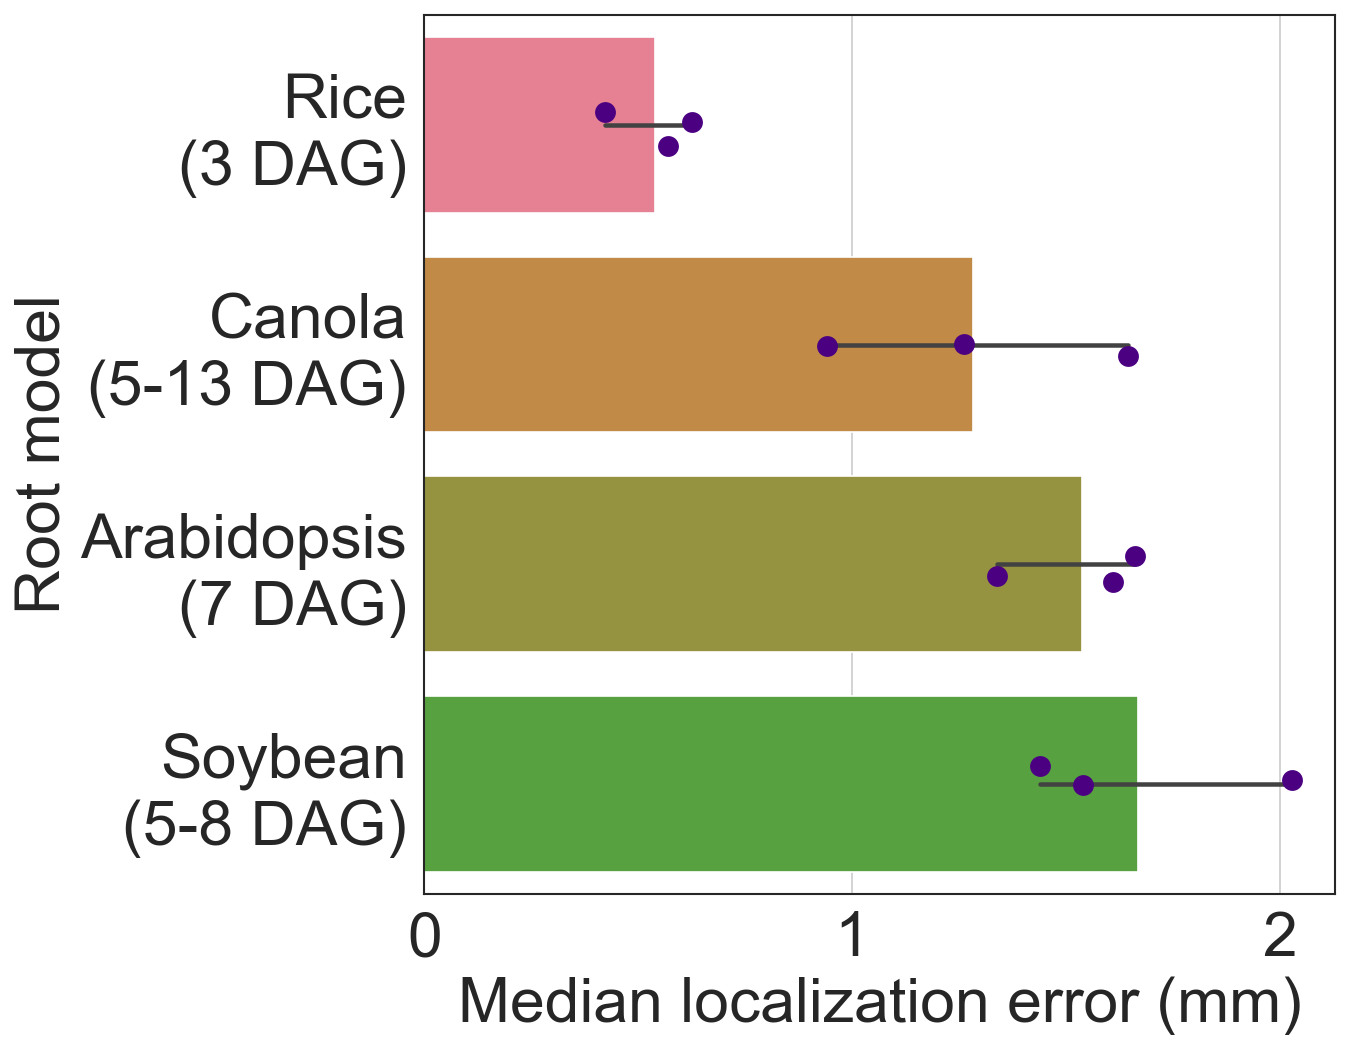

In [ ]:
trait = "Error distance (50%) mm"
order_primary = primary_df[["Root-label", f"{trait}"]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "primary"
y_labels_pr = [label.replace(" primary", "").replace(" (", "\n(") for label in primary_labels]

# sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10, 8))

# Bar plot
sns.barplot(data=primary_df, y="Root-label", x=f"{trait}", order=order_primary, palette=custom_colors[0:4], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=primary_df, y="Root-label", x=f"{trait}", color="#4B0082", marker='o', size=10, order=order_primary, jitter=True, ax=ax)

ax.set(xlabel='Median localization error (mm)', ylabel='Root model')
ax.grid(axis='x')

# Uncomment the line below if you want to rotate the x-axis labels
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# Update y-axis labels
ax.set_yticklabels(y_labels_pr)

plt.tight_layout()

# Show or save the plot
plt.savefig(r"figures/accuracy/median_loc_error_primary.png", bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_error_primary.pdf", bbox_inches="tight", facecolor="white")

C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
meta NOT subset; don't know how to subset; dropped


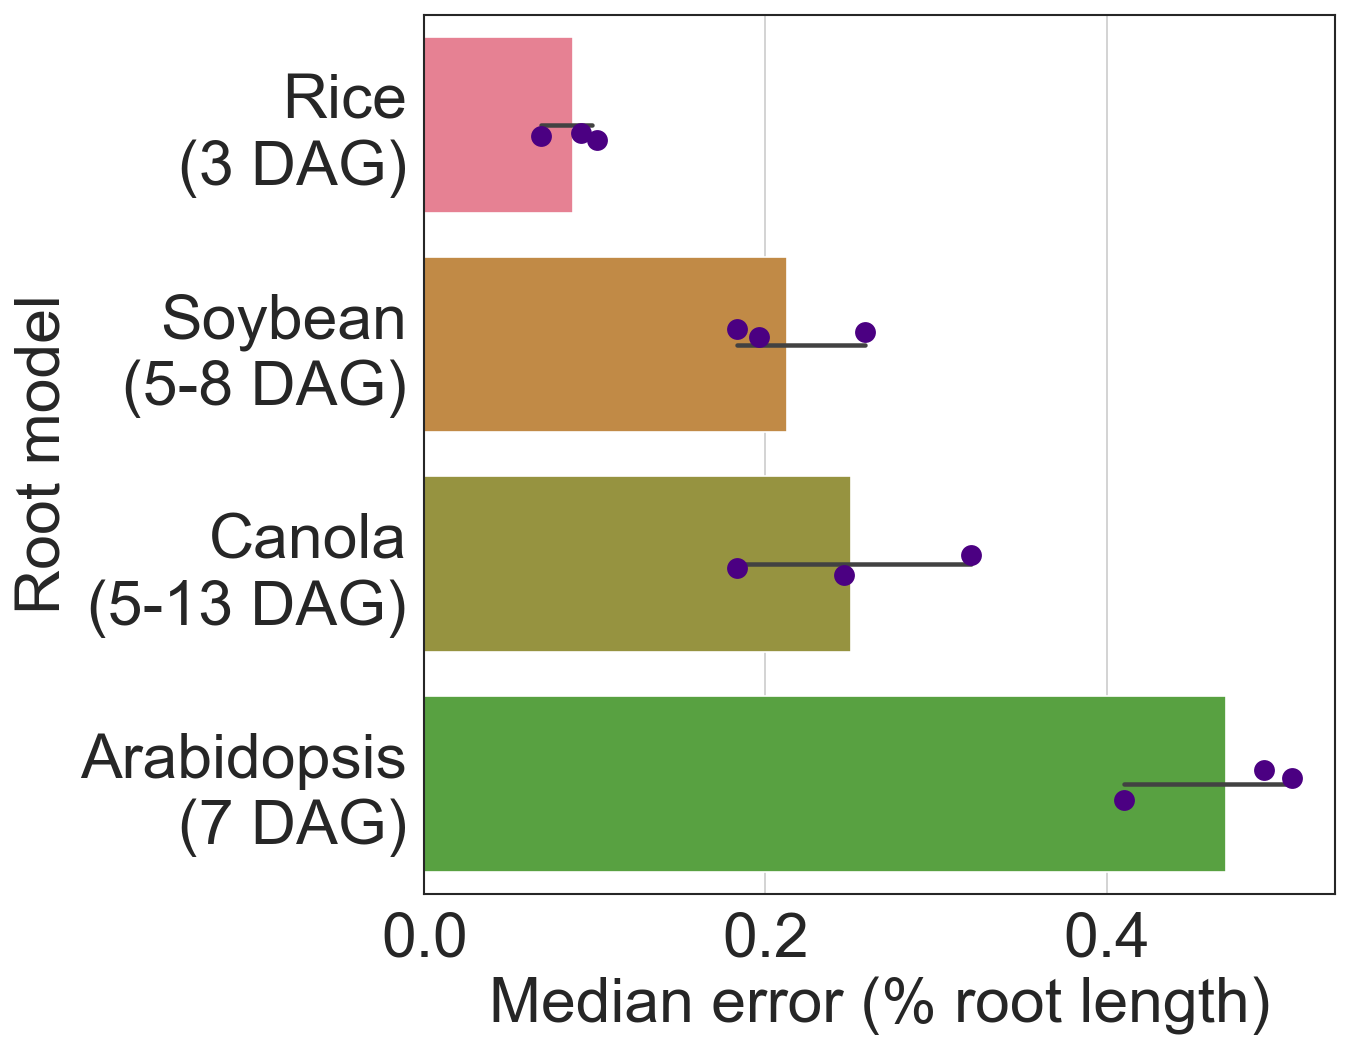

In [ ]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Assuming that you have already filtered and calculated the average root lengths for the primary data
avg_df_primary = df_model_avg_root_lengths[df_model_avg_root_lengths["Root-label"].isin(primary_labels)].groupby("Root-label")["Average Root Length"].mean()

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
primary_df[normalized_trait] = primary_df.apply(lambda row: (row[trait] / avg_df_primary[row["Root-label"]]) * 100, axis=1)
# Add the average root length as a new column in primary_df
primary_df['Average Root Length'] = primary_df['Root-label'].map(avg_df_primary)

order_primary = primary_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "primary"
y_labels_pr = [label.replace(" primary", "").replace(" (", "\n(") for label in order_primary]

fig, ax = plt.subplots(figsize=(10, 8))

# Bar plot
sns.barplot(data=primary_df, y="Root-label", x=normalized_trait, order=order_primary, palette=custom_colors[0:4], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=primary_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_primary, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_pr)

plt.tight_layout()

# Save the plot
png_path = r"figures/accuracy/median_loc_percent_root_length_error_primary.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_percent_root_length_error_primary.pdf", bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
primary_df.to_csv(csv_path, index=False)

In [ ]:
# Define the list of target labels
seminal_labels = ["Rice seminal (3 DAG)", "Rice seminal (10 DAG)"]

# Filter the dataframe based on the target labels
seminal_df = df_all[df_all["Root-label"].isin(seminal_labels)]
seminal_df.shape

(6, 13)

In [ ]:
custom_colors[7:9]

[(0.731751635642941, 0.5128186367840487, 0.9581005178234921),
 (0.9614880299080136, 0.3909885385134758, 0.8298287106954371)]

meta NOT subset; don't know how to subset; dropped


<function matplotlib.pyplot.show(close=None, block=None)>

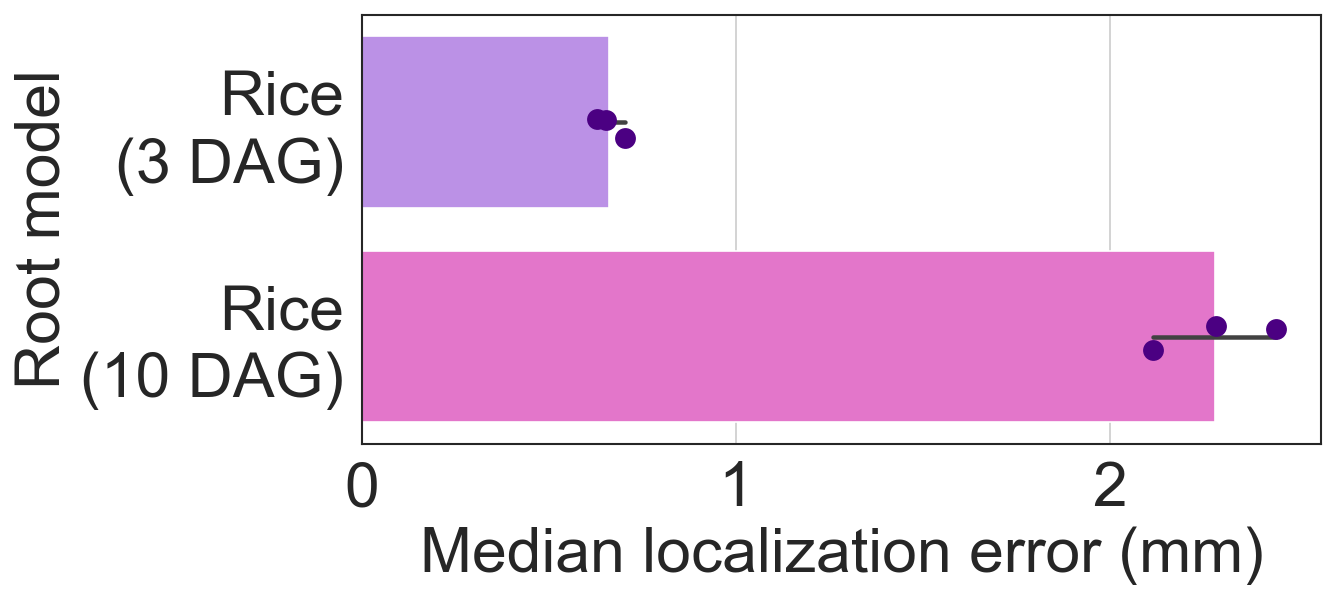

In [ ]:
trait = "Error distance (50%) mm"
order_sem = seminal_df[["Root-label", f"{trait}"]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "primary"
y_labels_sem = [label.replace(" seminal", "").replace(" (", "\n(") for label in seminal_labels]

# sns.set_theme(style="white", context="talk")

fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot
sns.barplot(data=seminal_df, y="Root-label", x=f"{trait}", order=order_sem, palette=custom_colors[7:9], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=seminal_df, y="Root-label", x=f"{trait}", color="#4B0082", marker='o', size=10, order=order_sem, jitter=True, ax=ax)

ax.set(xlabel='Median localization error (mm)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_sem)

plt.tight_layout()

# Show or save the plot
plt.savefig(r"figures/accuracy/median_loc_error_seminal.png", bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_error_seminal.pdf", bbox_inches="tight", facecolor="white")
plt.show

C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\eb\.conda\envs\sleap_v1.3.3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
meta NOT subset; don't know how to subset; dropped


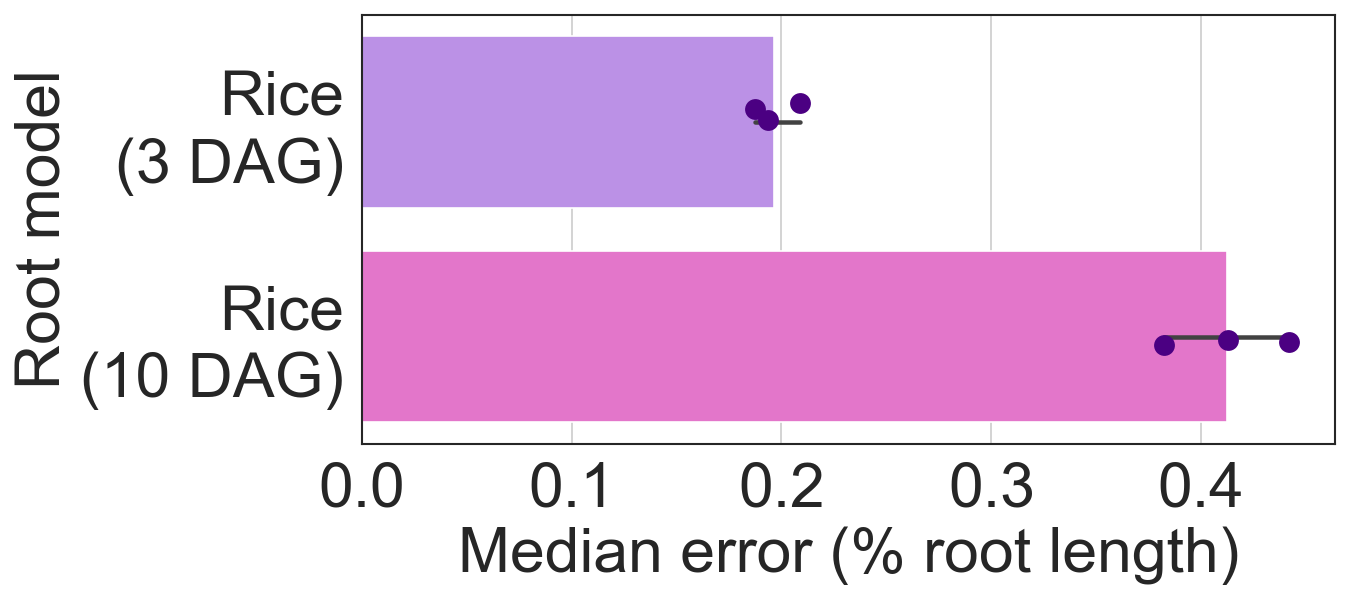

In [ ]:
trait = "Error distance (50%) mm"
normalized_trait = "Median error (% root length)"

# Assuming you've already filtered and calculated the average root lengths for the seminal data
avg_df_seminal = df_model_avg_root_lengths[df_model_avg_root_lengths["Root-label"].isin(seminal_labels)].groupby("Root-label")["Average Root Length"].mean()

# Normalize the trait by dividing by the average root length for each model and sample and save it in a new column
seminal_df[normalized_trait] = seminal_df.apply(lambda row: (row[trait] / avg_df_seminal[row["Root-label"]]) * 100, axis=1)
# Add the average root length as a new column in seminal_df
seminal_df['Average Root Length'] = seminal_df['Root-label'].map(avg_df_seminal)

order_sem = seminal_df[["Root-label", normalized_trait]].groupby("Root-label").apply(np.nanmean).sort_values().index

# Alter labels to remove "seminal" based on order_sem for consistency
y_labels_sem = [label.replace(" seminal", "").replace(" (", "\n(") for label in order_sem]

fig, ax = plt.subplots(figsize=(10, 5))

# Bar plot
sns.barplot(data=seminal_df, y="Root-label", x=normalized_trait, order=order_sem, palette=custom_colors[7:9], ax=ax)

# Scatter plot with jittered points
sns.stripplot(data=seminal_df, y="Root-label", x=normalized_trait, color="#4B0082", marker='o', size=10, order=order_sem, jitter=True, ax=ax)

ax.set(xlabel='Median error (% root length)', ylabel='Root model')
ax.grid(axis='x')

# Update y-axis labels
ax.set_yticklabels(y_labels_sem)

plt.tight_layout()

# Save the plot
png_path = r"figures/accuracy/median_loc_percent_root_length_error_seminal.png"
plt.savefig(png_path, bbox_inches="tight", facecolor="white")
plt.savefig(r"figures/accuracy/median_loc_percent_root_length_error_seminal.pdf", bbox_inches="tight", facecolor="white")

# Save the dataframe to CSV with the same name as the PNG but with .csv extension
csv_path = os.path.splitext(png_path)[0] + '.csv'
seminal_df.to_csv(csv_path, index=False)

plt.show()

**Save summary data to a csv** 

In [ ]:
# Lateral models data
lateral_summary_df = lateral_df.copy()

# Group by "Root-label" and calculate mean for each group
lateral_summary_df = lateral_summary_df.groupby('Root-label').mean().reset_index()

# If you want to keep the "Root-label" column as a column and not as an index after grouping
lateral_summary_df.reset_index(drop=True, inplace=True)

# Primary models data
primary_summary_df = primary_df.copy()

# Group by "Root-label" and calculate mean for each group
primary_summary_df = primary_summary_df.groupby('Root-label').mean().reset_index()

# If you want to keep the "Root-label" column as a column and not as an index after grouping
primary_summary_df.reset_index(drop=True, inplace=True)

# Seminal models data
seminal_summary_df = seminal_df.copy()

# Group by "Root-label" and calculate mean for each group
seminal_summary_df = seminal_summary_df.groupby('Root-label').mean().reset_index()

# If you want to keep the "Root-label" column as a column and not as an index after grouping
seminal_summary_df.reset_index(drop=True, inplace=True)

# Append summary csvs
all_summary_df = primary_summary_df.copy()
all_summary_df = all_summary_df.append(lateral_summary_df)
all_summary_df = all_summary_df.append(seminal_summary_df)

# Print 
all_summary_df

,Root-label,Error distance (50%) mm,Error distance (90%) mm,Error distance (95%) mm,Error distance (99%) mm,Error distance (avg) mm,Error std mm,Vis Precision,Vis Recall,oks mAP,oks mAR,Median error (% root length),Average Root Length
0,Arabidopsis primary (7 DAG),1.537197,6.728446,12.835689,16.483645,3.129068,4.040088,1.000000,0.955556,0.000000,0.000000,0.470334,326.830727
1,Canola primary (5-13 DAG),1.282756,3.790891,4.806499,8.391962,1.815580,1.838277,1.000000,0.932702,0.094424,0.162077,0.250122,512.851432
2,Rice primary (3 DAG),0.539643,1.710551,2.177131,4.103148,0.793593,0.796781,1.000000,0.997126,0.284528,0.421779,0.087227,618.666921
3,Soybean primary (5-8 DAG),1.668541,7.312727,10.963478,18.978681,3.077679,3.934360,1.000000,0.906305,0.207683,0.288580,0.212819,784.017194
0,Arabidopsis lateral (7 DAG),0.842702,5.320595,7.556526,13.795722,1.996429,2.742697,0.998333,0.866246,0.000756,0.005747,0.984804,85.570506
1,Canola lateral (5-13 DAG),0.365802,6.783311,14.072267,31.877000,2.500724,6.153926,0.998175,0.940144,0.007482,0.040832,0.385455,94.901458
2,Soybean lateral (5-8 DAG),0.327268,5.739953,12.959421,29.592298,2.265514,5.993160,0.985325,0.959397,0.019668,0.085828,0.275626,118.736384
0,Rice seminal (10 DAG),2.280872,14.167564,21.442857,34.911618,5.102307,7.411788,0.994515,0.806041,0.014734,0.065116,0.412237,553.291572
1,Rice seminal (3 DAG),0.661921,5.011158,10.798983,37.048162,2.425428,6.547624,0.995876,0.900736,0.040454,0.126809,0.196629,336.633940


In [ ]:
all_summary_df.to_csv(r"error_summary\average_model_error_summary_figure_5.csv", index=False)